<a href="https://colab.research.google.com/github/pszachew/Music-Genre-Classification/blob/master/IRMAS/training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import json

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
X = pd.read_csv('/content/gdrive/MyDrive/csv_data/IRMAS_embedded.csv',header=None)

In [4]:
y = pd.read_csv('/content/gdrive/MyDrive/csv_data/IRMAS_labels.csv', header=None)

In [5]:
scaler = StandardScaler()
scaler.fit(X)
X_sc =pd.DataFrame(scaler.transform(X))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.3, random_state=10)

In [7]:
instruments = np.sort(y[0].unique())

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_mod = LogisticRegression(max_iter=10000)

In [ ]:
log_reg_mod.fit(X_train, np.array(y_train).flatten())

LogisticRegression(max_iter=10000)

In [ ]:
joblib.dump(log_reg_mod, 'IRMAS_log_reg.sav')

['IRMAS_log_reg.sav']

In [ ]:
y_pre_lg = log_reg_mod.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pre_lg))

              precision    recall  f1-score   support

         cel       0.70      0.71      0.71       127
         cla       0.70      0.66      0.68       158
         flu       0.68      0.73      0.70       133
         gac       0.84      0.85      0.85       186
         gel       0.78      0.81      0.79       232
         org       0.86      0.88      0.87       195
         pia       0.87      0.89      0.88       214
         sax       0.67      0.62      0.65       168
         tru       0.82      0.74      0.78       194
         vio       0.66      0.68      0.67       172
         voi       0.93      0.93      0.93       233

    accuracy                           0.79      2012
   macro avg       0.77      0.77      0.77      2012
weighted avg       0.79      0.79      0.79      2012



In [ ]:
print(confusion_matrix(y_test, y_pre_lg))

[[ 90   2   4   0   5   1   2   5   0  17   1]
 [  7 104  10   1   4   0   2  19   5   4   2]
 [  2   5  97   6   0   6   4   7   1   3   2]
 [  3   1   2 159  11   1   6   0   1   1   1]
 [  3   3   3  11 188   6   4   1   5   5   3]
 [  0   1   7   0   9 172   3   0   2   0   1]
 [  1   1   2   7   4   5 191   0   1   2   0]
 [  6  11   5   1   8   2   4 105  11  13   2]
 [  2  12   6   1   2   2   1  11 143  12   2]
 [ 14   8   3   1   8   3   1   8   6 117   3]
 [  0   1   4   3   3   1   1   1   0   3 216]]


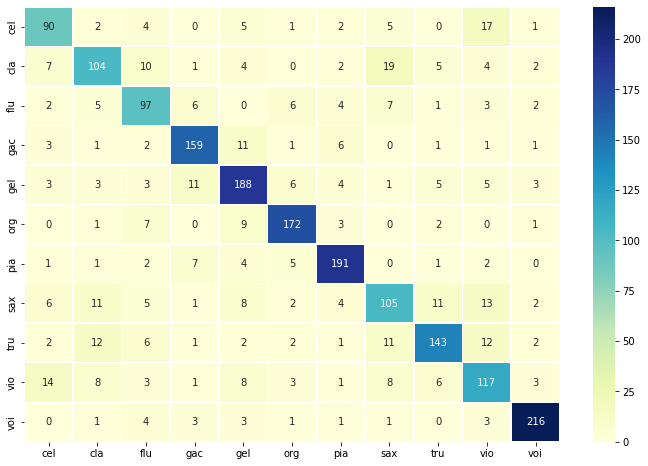

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pre_lg), index=instruments, columns=instruments), annot=True, linewidths=.5, cmap="YlGnBu", fmt='g')
plt.show()

## **KNN**

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
neigh = KNeighborsClassifier(n_neighbors = 4)
neigh.fit(X_train, np.array(y_train).flatten())

KNeighborsClassifier(n_neighbors=4)

In [11]:
print(classification_report(neigh.predict(X_test),y_test))

              precision    recall  f1-score   support

         cel       0.80      0.67      0.73       152
         cla       0.80      0.62      0.70       206
         flu       0.71      0.57      0.63       166
         gac       0.89      0.76      0.82       216
         gel       0.79      0.69      0.74       265
         org       0.87      0.81      0.84       210
         pia       0.80      0.89      0.85       193
         sax       0.54      0.60      0.56       151
         tru       0.56      0.87      0.68       125
         vio       0.59      0.73      0.66       139
         voi       0.77      0.95      0.85       189

    accuracy                           0.74      2012
   macro avg       0.74      0.74      0.73      2012
weighted avg       0.76      0.74      0.74      2012



## **SVM**

In [12]:
from sklearn.svm import SVC

In [13]:
mod_svm = SVC(kernel='linear')

In [14]:
mod_svm.fit(X_train, np.array(y_train).flatten())

SVC(kernel='linear')

In [15]:
print(classification_report(mod_svm.predict(X_test),y_test))

              precision    recall  f1-score   support

         cel       0.78      0.74      0.76       134
         cla       0.70      0.68      0.69       163
         flu       0.77      0.68      0.72       149
         gac       0.88      0.84      0.86       193
         gel       0.84      0.77      0.80       253
         org       0.90      0.87      0.88       203
         pia       0.88      0.90      0.89       209
         sax       0.59      0.66      0.62       151
         tru       0.72      0.86      0.79       162
         vio       0.68      0.71      0.69       165
         voi       0.93      0.94      0.94       230

    accuracy                           0.80      2012
   macro avg       0.79      0.79      0.79      2012
weighted avg       0.80      0.80      0.80      2012



## **Random Forests**

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=500)

In [19]:
rfc.fit(X_train, np.array(y_train).flatten())

RandomForestClassifier(n_estimators=500)

In [22]:
print(classification_report(rfc.predict(X_test),y_test))

              precision    recall  f1-score   support

         cel       0.45      0.83      0.58        69
         cla       0.45      0.61      0.52       117
         flu       0.45      0.75      0.56        80
         gac       0.82      0.77      0.79       197
         gel       0.84      0.59      0.70       331
         org       0.82      0.67      0.73       238
         pia       0.87      0.78      0.82       237
         sax       0.48      0.43      0.45       188
         tru       0.58      0.85      0.69       131
         vio       0.59      0.58      0.58       177
         voi       0.92      0.87      0.90       247

    accuracy                           0.69      2012
   macro avg       0.66      0.70      0.67      2012
weighted avg       0.72      0.69      0.70      2012



## **Gradient Boosting**

In [20]:
import xgboost as xgb

In [23]:
xgbc = xgb.XGBClassifier(max_depths=7, learning_rate=0.1)

In [ ]:
xgbc.fit(X_train, np.array(y_train).flatten())

In [ ]:
print(classification_report(xgbc.predict(X_test),y_test))